In [463]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [464]:
car_data = pd.read_csv("car_data.csv", header = 0)
car_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [465]:
car_data.shape
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [466]:
# Limpiar los datos
car_data.drop(['User ID'], axis = 1, inplace = True)
car_data['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
car_data.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


In [467]:
# Obtener la Y de la base de datos
Y = car_data['Purchased']
X = car_data.drop(['Purchased'], axis = 1)

In [468]:
# Normalizar los datos
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [469]:
# Dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.2, random_state = 55)

In [470]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

## Modelo Inicial

In [471]:
# Crear el modelo con 1 sola capa oculta
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 2, activation = "relu", input_dim = x_train.shape[1]))
model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [472]:
# Compilar el modelo
model.compile(
    optimizer = "sgd",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

In [473]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 2)                 8         
                                                                 
 dense_181 (Dense)           (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [474]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model.fit(x_train, y_train, epochs = 100, verbose = True, validation_split = 0.2)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7118 - binary_accuracy: 0.5922 - val_loss: 0.7177 - val_binary_accuracy: 0.5562
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7008 - binary_accuracy: 0.5656 - val_loss: 0.7064 - val_binary_accuracy: 0.5500
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6910 - binary_accuracy: 0.5531 - val_loss: 0.6965 - val_binary_accuracy: 0.5500
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6823 - binary_accuracy: 0.5500 - val_loss: 0.6876 - val_binary_accuracy: 0.5437
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6745 - binary_accuracy: 0.5500 - val_loss: 0.6797 - val_binary_accuracy: 0.5437
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.5469 - val_loss: 0.6724 - val_binary_accuracy: 0.5437
Epoch 7/100
20/20 [==========================

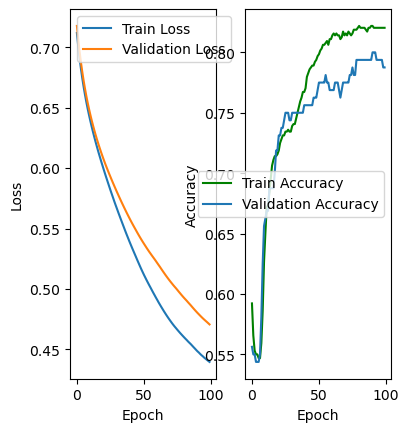

In [475]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Validation Loss')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Validation Accuracy')

plt.legend()
plt.show()

## Predicciones

In [476]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
y_hat=model.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Binary Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 1ms/step
Roc AUC:  0.8074348676758315
Binary Accuracy:  0.83


# Mejora de Modelo

In [478]:
# Crear el modelo
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units = 8, activation = "relu", input_dim = x_train.shape[1]))
model2.add(tf.keras.layers.Dense(units = 4, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 2, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [479]:
# Compilar el modelo
model2.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()]
)

In [480]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model2.fit(x_train, y_train, epochs = 400, verbose = True, validation_split = 0.2)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/400
20/20 [==============================] - 1s 12ms/step - loss: 0.6611 - binary_accuracy: 0.5938 - auc_36: 0.6480 - val_loss: 0.6513 - val_binary_accuracy: 0.6187 - val_auc_36: 0.6927
Epoch 2/400
20/20 [==============================] - 0s 2ms/step - loss: 0.6462 - binary_accuracy: 0.5969 - auc_36: 0.7079 - val_loss: 0.6348 - val_binary_accuracy: 0.6187 - val_auc_36: 0.7339
Epoch 3/400
20/20 [==============================] - 0s 2ms/step - loss: 0.6306 - binary_accuracy: 0.5969 - auc_36: 0.7641 - val_loss: 0.6188 - val_binary_accuracy: 0.6187 - val_auc_36: 0.7558
Epoch 4/400
20/20 [==============================] - 0s 3ms/step - loss: 0.6152 - binary_accuracy: 0.5969 - auc_36: 0.7932 - val_loss: 0.6025 - val_binary_accuracy: 0.6187 - val_auc_36: 0.7979
Epoch 5/400
20/20 [==============================] - 0s 3ms/step - loss: 0.5995 - binary_accuracy: 0.5969 - auc_36: 0.8213 - val_loss: 0.5854 - val_binary_accuracy: 0.6187 - val_auc_36: 0.8231
Epoch 6/4

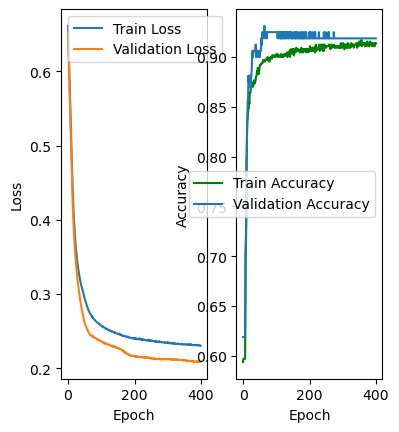

In [481]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Validation Loss')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Validation Accuracy')

plt.legend()
plt.show()


## Predicciones

In [482]:
y_hat=model2.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Test Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 1000us/step
Roc AUC:  0.9339408917722171
Test Accuracy:  0.935
